In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import matplotlib.pyplot as plt
import geoplot.crs as ccrs
%matplotlib inline

In [3]:
collisions = pd.read_csv("./data/NYPD Motor Vehicle Collisions.csv", index_col=0)
collisions = gpd.GeoDataFrame(collisions, geometry=collisions.apply(lambda srs: Point(srs['LONGITUDE'], srs['LATITUDE']), axis='columns'))

In [4]:
census_tracts = gpd.read_file("./data/nyc_census_tracts_2010.geojson", driver='GeoJSON')

In [5]:
from geoplot import geoplot as gplt

In [6]:
cc = collisions.head(1000)[collisions.head(1000).apply(lambda srs: pd.notnull(srs['geometry'].x) and pd.notnull(srs['geometry'].y), axis='columns')]

In [89]:
cities = gpd.read_file("./data/citiesx010g.shp")
cities_m = cities[cities['STATE'].map(lambda s: s not in ['PR', 'AK', 'HI', 'VI'])]

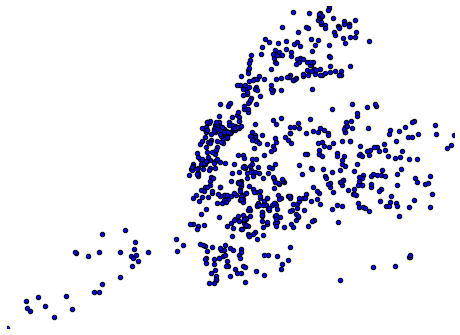

In [84]:
gplt.pointplot(cc, projection=ccrs.PlateCarree())

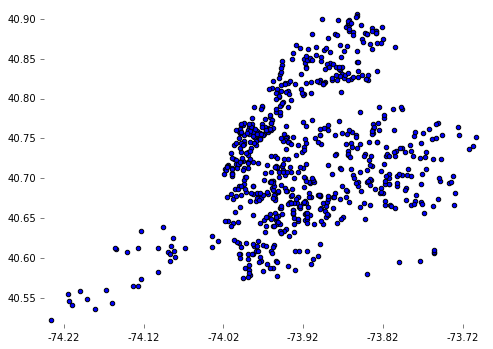

In [87]:
gplt.pointplot(cc, projection=ccrs.PlateCarree(), spines=True)

In [79]:
cc.geometry

DATE
08/25/2015                  POINT (-73.9203819 40.7329414)
06/24/2016                   POINT (-74.0074061 40.703385)
06/24/2016           POINT (-73.95066609999999 40.6431277)
06/24/2016    POINT (-74.00156559999999 40.71729929999999)
06/24/2016           POINT (-73.9335177 40.79859320000001)
06/24/2016                  POINT (-73.9777752 40.6082883)
06/24/2016           POINT (-73.89946929999999 40.6790235)
06/24/2016           POINT (-73.81984890000001 40.8900764)
06/24/2016           POINT (-73.94423399999999 40.8474611)
06/24/2016                  POINT (-73.9437879 40.7109013)
06/24/2016                  POINT (-73.9501533 40.6832699)
06/24/2016           POINT (-73.89685859999999 40.8238479)
06/24/2016                  POINT (-73.9813242 40.6799525)
06/24/2016           POINT (-73.8307396 40.76768389999999)
06/24/2016           POINT (-73.86908079999999 40.8310849)
06/24/2016                  POINT (-73.8266119 40.8846495)
06/24/2016           POINT (-73.9559457 40.69686710

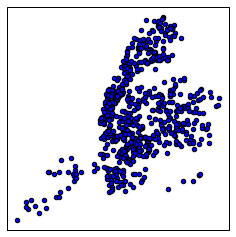

In [9]:
gplt.pointplot(cc, projection=ccrs.AlbersEqualArea())

> c:\users\alex\desktop\geoplot\geoplot\geoplot.py(68)pointplot()
-> if extent:
(Pdb) c
> c:\users\alex\desktop\geoplot\geoplot\geoplot.py(269)_lay_out_axes()
-> ax.set_xticklabels(['{:.2f}'.format(x_transform(pos)) for pos in ax.get_xticks()])
(Pdb) c


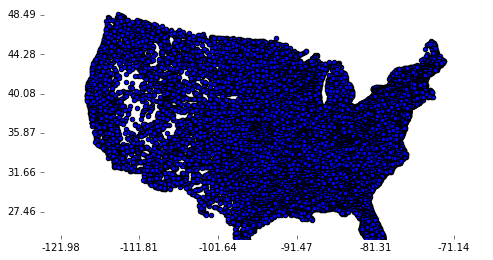

In [155]:
gplt.pointplot(cities_m, projection=ccrs.AlbersEqualArea(), spines=True)

> c:\users\alex\desktop\geoplot\geoplot\geoplot.py(68)pointplot()
-> if extent:
(Pdb) c


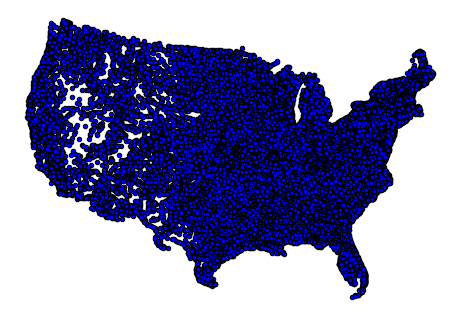

In [159]:
gplt.pointplot(cities_m, projection=ccrs.AlbersEqualArea())

> c:\users\alex\desktop\geoplot\geoplot\geoplot.py(68)pointplot()
-> if extent:
(Pdb) xmin
-124.63660389999995
(Pdb) ymin
24.555702500000052
(Pdb) q


BdbQuit: 

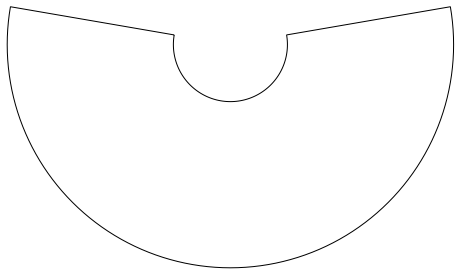

In [157]:
gplt.pointplot(cities_m, projection=ccrs.AlbersEqualArea())

In [132]:
import pyproj
from pyproj import Proj

In [126]:
c = pyproj.Proj(init='epsg:4326')

In [140]:
c(180, 180)

(1e+30, 1e+30)

In [148]:
cc = Proj({'y_0': 0.0, 'lon_0': -91.360458123871652, 'ellps': 'WGS84', 'lat_2': 50.0, 'lat_0': 38.834700143022069, 'lat_1': 20.0, 'proj': 'aea', 'x_0': 0.0})

In [ ]:
cc(-17702759.188239746, -9023685.996813634)

In [147]:
inProj = Proj({'y_0': 0.0, 'lon_0': -91.360458123871652, 'ellps': 'WGS84', 'lat_2': 50.0, 'lat_0': 38.834700143022069, 'lat_1': 20.0, 'proj': 'aea', 'x_0': 0.0})
outProj = Proj(init='epsg:4326')
x1,y1 = 180, 180
x2,y2 = pyproj.transform(inProj,outProj,x1,y1)
print(x2,y2)

-91.3583141422537 38.83626797542916


In [8]:
from random import randint
census_tracts['mock_data'] = [randint(10, 1000) for _ in range(len(census_tracts))]

In [20]:
census_tracts.geometry.name

'geometry'

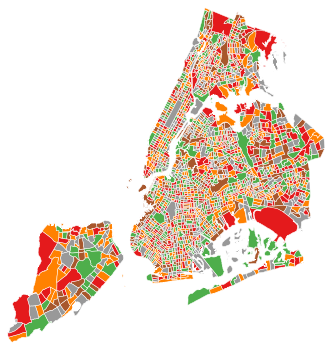

In [35]:
gplt.choropleth(census_tracts, data='mock_data', projection=ccrs.AlbersEqualArea(), edgecolor='white', linewidth=0.5)

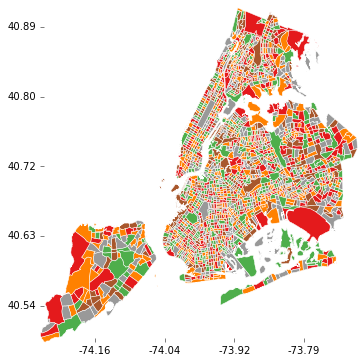

In [37]:
gplt.choropleth(census_tracts, data='mock_data', projection=ccrs.AlbersEqualArea(), edgecolor='white', linewidth=0.5,
                spines=True, scheme='QUANTILES')

In [40]:
census_tracts['mock_category'] = [randint(1, 5) for _ in range(len(census_tracts))]

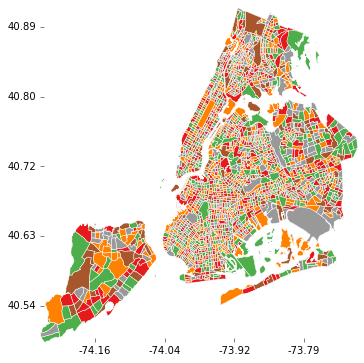

In [42]:
gplt.choropleth(census_tracts, data='mock_category', projection=ccrs.AlbersEqualArea(), edgecolor='white', linewidth=0.5,
                spines=True)

> c:\users\alex\desktop\geoplot\geoplot\geoplot.py(144)choropleth()
-> categories = np.unique(data)
(Pdb) c
> c:\users\alex\desktop\geoplot\geoplot\geoplot.py(171)choropleth()
-> patches = []
(Pdb) c


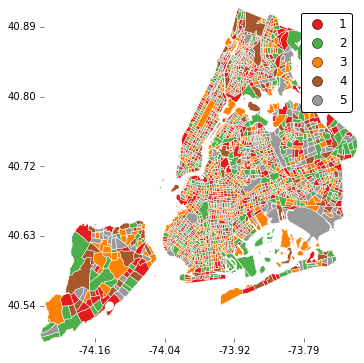

In [53]:
gplt.choropleth(census_tracts, data='mock_category', projection=ccrs.AlbersEqualArea(), edgecolor='white', linewidth=0.5,
                spines=True, legend=True)

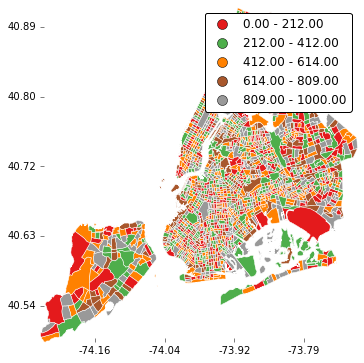

In [65]:
gplt.choropleth(census_tracts, data='mock_data', projection=ccrs.AlbersEqualArea(), edgecolor='white', linewidth=0.5,
                spines=True, legend=True)

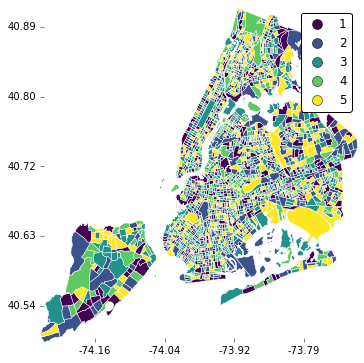

In [71]:
gplt.choropleth(census_tracts, hue='mock_category', projection=ccrs.AlbersEqualArea(), edgecolor='white', linewidth=0.5,
                spines=True, legend=True, categorical=True, cmap='viridis')

> c:\users\alex\desktop\geoplot\geoplot\geoplot.py(269)_lay_out_axes()
-> ax.set_xticklabels(['{:.2f}'.format(x_transform(pos)) for pos in ax.get_xticks()])
(Pdb) c


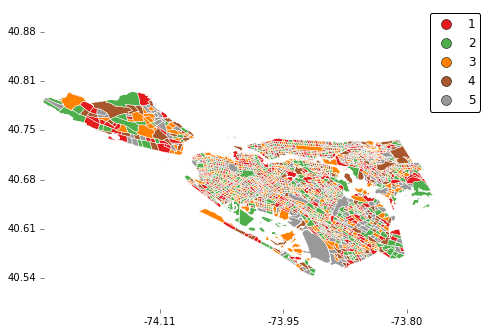

In [158]:
gplt.choropleth(census_tracts, hue='mock_category', projection=ccrs.Gnomonic(), edgecolor='white', linewidth=0.5,
                spines=True, legend=True, categorical=True)